## Vehicle Detection

The steps of this project are the following:

* Feature extraction from images
* Train a SVC classifier with car notcar images
* Apply window search on the target images
* Obtain heat map & draw boxes around detected vehicles
* Apply the pipeline on a video

---


# Data Exploration

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


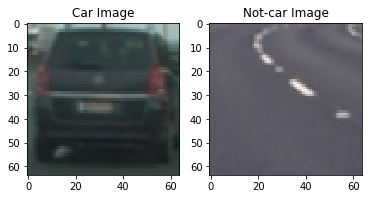

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

cars = glob.glob('vehicles/vehicles/*/*.png')
notcars = glob.glob('non-vehicles/non-vehicles/*/*.png')

# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict


data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])

# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Not-car Image')


# Feature Extraction

## HOG Features

In [2]:
from skimage.feature import hog
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)

        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)

        return features 

### Hog Features on Car Images

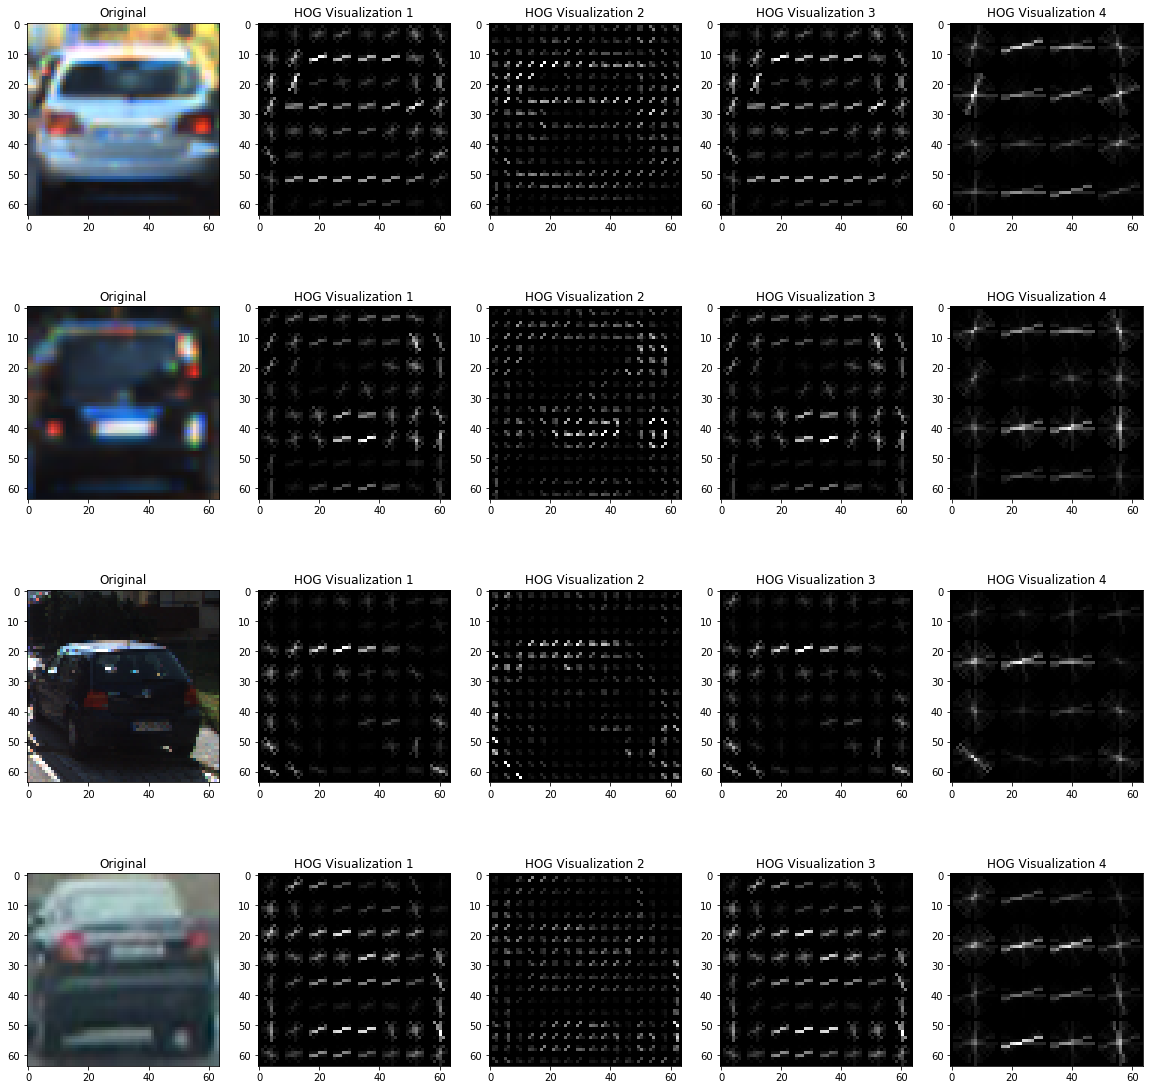

In [3]:
f=plt.figure(figsize=(20, 20))
n_image = 4
for i in range (0,n_image):
    # Generate a random index to look at a car image
    ind = np.random.randint(0, len(cars))
    # Read in the image
    image = mpimg.imread(cars[ind])
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
    # Call our function with vis=True to see an image output
    features, hog_image1 = get_hog_features(gray, orient= 9, 
                            pix_per_cell= 8, cell_per_block= 2, 
                            vis=True, feature_vec=True)
    
    features, hog_image2 = get_hog_features(gray, orient= 16, 
                            pix_per_cell= 4, cell_per_block= 2, 
                            vis=True, feature_vec=True)
    
    features, hog_image3 = get_hog_features(gray, orient= 9, 
                            pix_per_cell= 8, cell_per_block= 4, 
                            vis=True, feature_vec=True)
    
    features, hog_image4 = get_hog_features(gray, orient= 16, 
                            pix_per_cell= 16, cell_per_block= 4, 
                            vis=True, feature_vec=True) 
    
    plt.subplot(n_image, 5, 5*i+1)
    plt.imshow(image)
    plt.title('Original', fontsize=12)
    plt.subplot(n_image, 5, 5*i+2)
    plt.imshow(hog_image1, cmap='gray')
    plt.title('HOG Visualization 1', fontsize=12)
    plt.subplot(n_image, 5, 5*i+3)
    plt.imshow(hog_image2, cmap='gray')
    plt.title('HOG Visualization 2', fontsize=12)
    plt.subplot(n_image, 5, 5*i+4)
    plt.imshow(hog_image3, cmap='gray')
    plt.title('HOG Visualization 3', fontsize=12)    
    plt.subplot(n_image, 5, 5*i+5)
    plt.imshow(hog_image4, cmap='gray')
    plt.title('HOG Visualization 4', fontsize=12)    
    

### HOG Features on NotCar Images

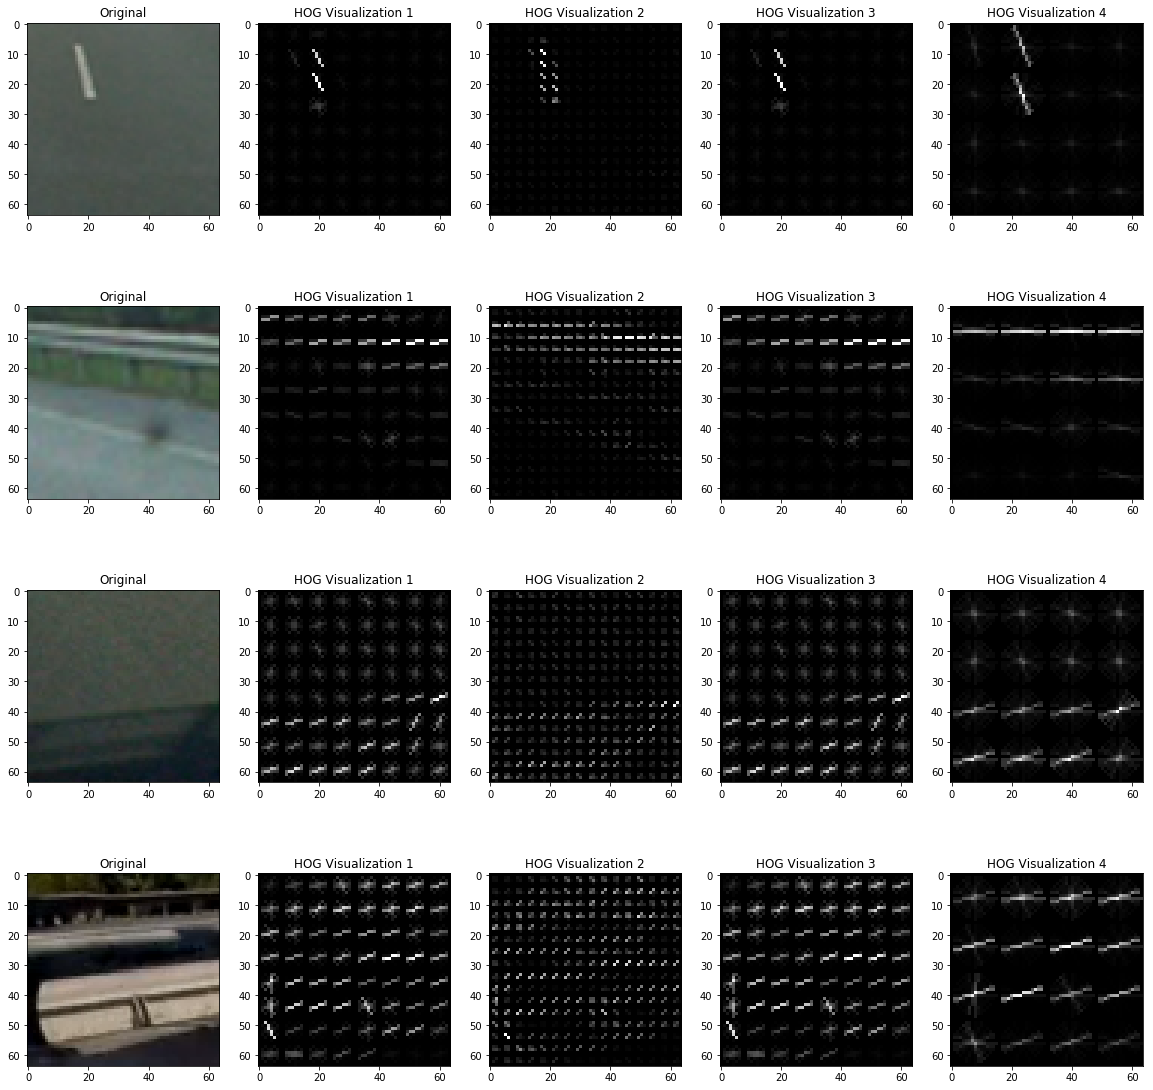

In [4]:
f=plt.figure(figsize=(20, 20))
n_image = 4
for i in range (0,n_image):
    # Generate a random index to look at a car image
    ind = np.random.randint(0, len(notcars))
    # Read in the image
    image = mpimg.imread(notcars[ind])
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
    # Call our function with vis=True to see an image output
    features, hog_image1 = get_hog_features(gray, orient= 9, 
                            pix_per_cell= 8, cell_per_block= 2, 
                            vis=True, feature_vec=True)
    
    features, hog_image2 = get_hog_features(gray, orient= 16, 
                            pix_per_cell= 4, cell_per_block= 2, 
                            vis=True, feature_vec=True)
    
    features, hog_image3 = get_hog_features(gray, orient= 9, 
                            pix_per_cell= 8, cell_per_block= 4, 
                            vis=True, feature_vec=True)
    
    features, hog_image4 = get_hog_features(gray, orient= 16, 
                            pix_per_cell= 16, cell_per_block= 4, 
                            vis=True, feature_vec=True) 
    
    plt.subplot(n_image, 5, 5*i+1)
    plt.imshow(image)
    plt.title('Original', fontsize=12)
    plt.subplot(n_image, 5, 5*i+2)
    plt.imshow(hog_image1, cmap='gray')
    plt.title('HOG Visualization 1', fontsize=12)
    plt.subplot(n_image, 5, 5*i+3)
    plt.imshow(hog_image2, cmap='gray')
    plt.title('HOG Visualization 2', fontsize=12)
    plt.subplot(n_image, 5, 5*i+4)
    plt.imshow(hog_image3, cmap='gray')
    plt.title('HOG Visualization 3', fontsize=12)    
    plt.subplot(n_image, 5, 5*i+5)
    plt.imshow(hog_image4, cmap='gray')
    plt.title('HOG Visualization 4', fontsize=12)    
    

## Spatial Binning and Histograms of Colors

In [3]:
def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))

def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

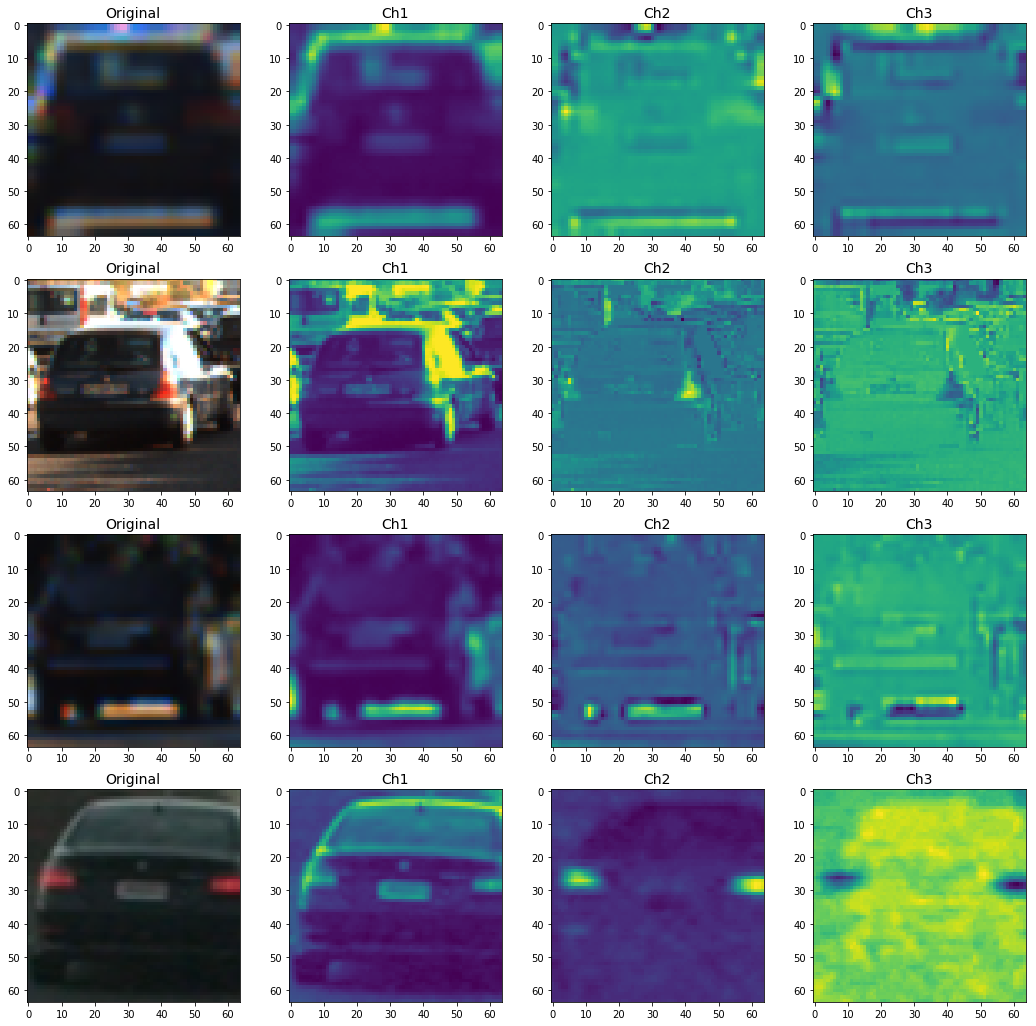

In [14]:
car_image = mpimg.imread(cars[109])
notcar_image = mpimg.imread(notcars[207])

converted_car_image = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)
car_ch1 = converted_car_image[:,:,0]
car_ch2 = converted_car_image[:,:,1]
car_ch3 = converted_car_image[:,:,2]
spatial_size = (32, 32) 
car_ch1_features = cv2.resize(car_ch1, spatial_size)
car_ch2_features = cv2.resize(car_ch2, spatial_size)
car_ch3_features = cv2.resize(car_ch3, spatial_size)

f=plt.figure(figsize=(18, 18))
for i in range (0,4):
    # Generate a random index to look at a car image
    ind = np.random.randint(0, len(cars))
    # Read in the image
    car_image = mpimg.imread(cars[ind])
    converted_car_image = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)
    car_ch1 = converted_car_image[:,:,0]
    car_ch2 = converted_car_image[:,:,1]
    car_ch3 = converted_car_image[:,:,2]
    
    plt.subplot(4, 4, 4*i+1)
    plt.imshow(car_image)
    plt.title('Original', fontsize=14)
    plt.subplot(4, 4, 4*i+2)
    plt.imshow(car_ch1)
    plt.title('Ch1', fontsize=14)
    plt.subplot(4, 4, 4*i+3)
    plt.imshow(car_ch2)
    plt.title('Ch2', fontsize=14)
    plt.subplot(4, 4, 4*i+4)
    plt.imshow(car_ch3)
    plt.title('Ch3', fontsize=14)   
    

# Combining Features

In [4]:
# a function to extract features from a list of images
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features


# HOG and Color Channels

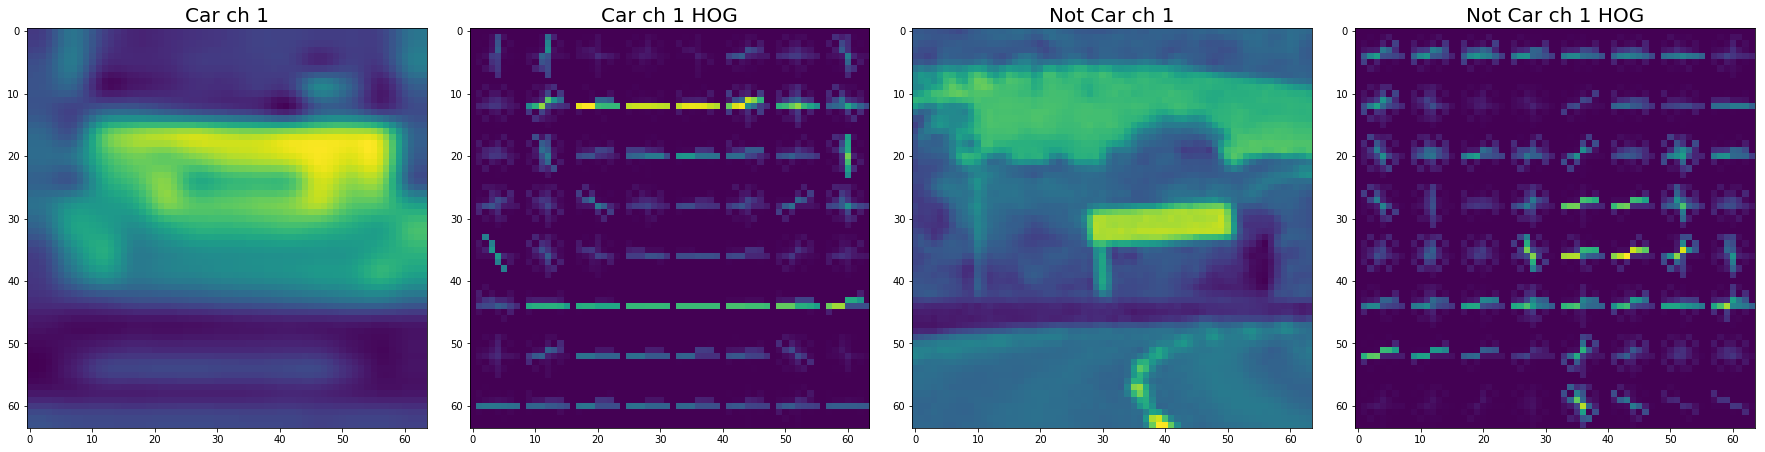

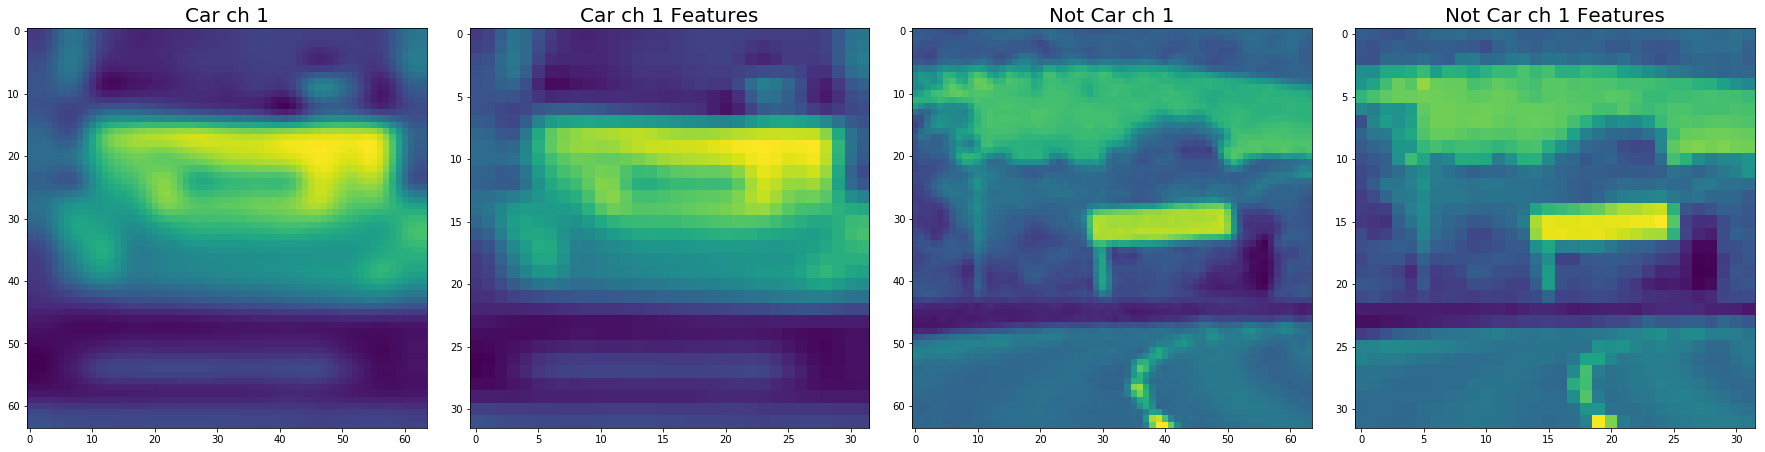

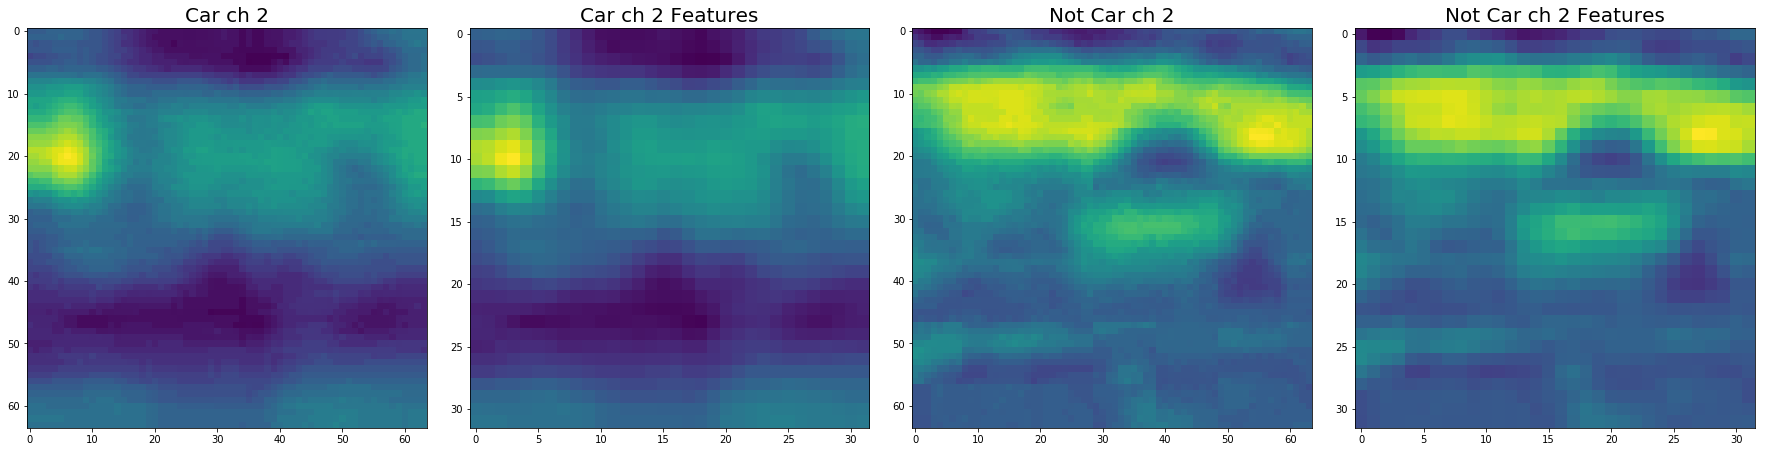

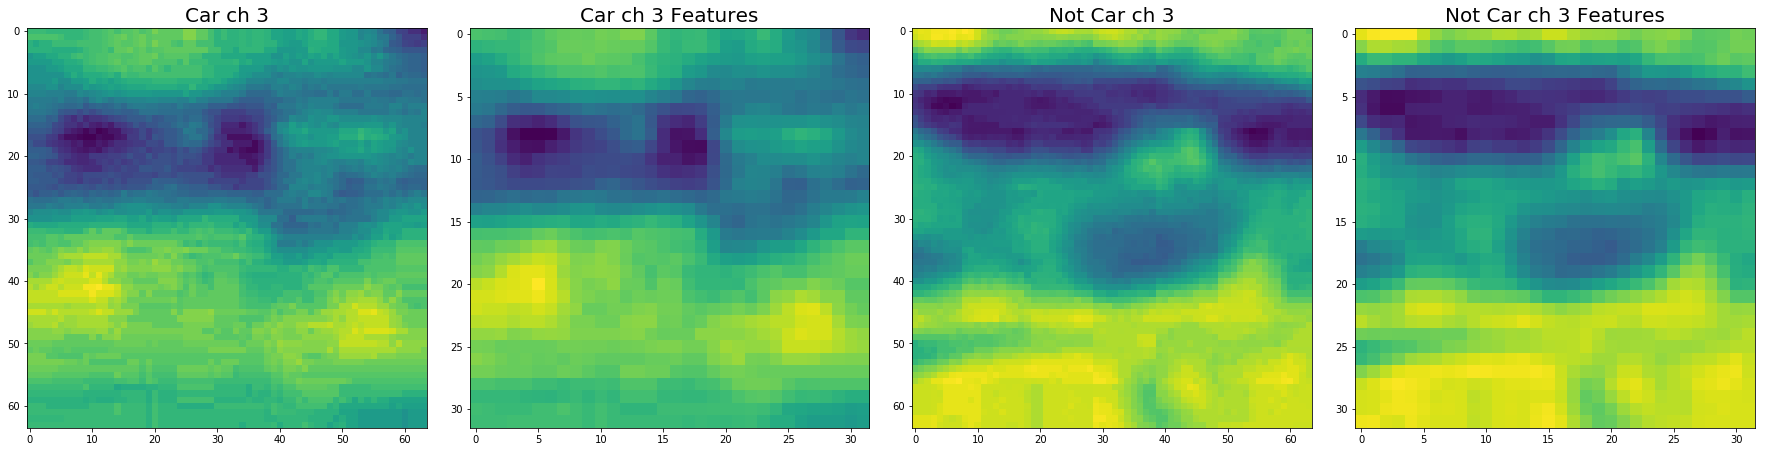

In [19]:
orient = 14  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions

# read random images
car_image = mpimg.imread(cars[109])
notcar_image = mpimg.imread(notcars[207])

car_image_conv = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)
car_ch1 = car_image_conv[:,:,0]
car_ch2 = car_image_conv[:,:,1]
car_ch3 = car_image_conv[:,:,2]

notcar_image_conv = cv2.cvtColor(notcar_image, cv2.COLOR_RGB2YCrCb)
notcar_ch1 = notcar_image_conv[:,:,0]
notcar_ch2 = notcar_image_conv[:,:,1]
notcar_ch3 = notcar_image_conv[:,:,2]

car_hog_feature, car_hog_image = get_hog_features(car_ch1, 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=True, feature_vec=True)

notcar_hog_feature, notcar_hog_image = get_hog_features(notcar_ch1, 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=True, feature_vec=True)

car_ch1_features = cv2.resize(car_ch1, spatial_size)
car_ch2_features = cv2.resize(car_ch2, spatial_size)
car_ch3_features = cv2.resize(car_ch3, spatial_size)
notcar_ch1_features = cv2.resize(notcar_ch1, spatial_size)
notcar_ch2_features = cv2.resize(notcar_ch2, spatial_size)
notcar_ch3_features = cv2.resize(notcar_ch3, spatial_size)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(car_ch1)
ax1.set_title("Car ch 1", fontsize=20)
ax2.imshow(car_hog_image)
ax2.set_title("Car ch 1 HOG", fontsize=20)
ax3.imshow(notcar_ch1)
ax3.set_title("Not Car ch 1", fontsize=20)
ax4.imshow(notcar_hog_image)
ax4.set_title("Not Car ch 1 HOG", fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(car_ch1)
ax1.set_title("Car ch 1", fontsize=20)
ax2.imshow(car_ch1_features)
ax2.set_title("Car ch 1 Features", fontsize=20)
ax3.imshow(notcar_ch1)
ax3.set_title("Not Car ch 1", fontsize=20)
ax4.imshow(notcar_ch1_features)
ax4.set_title("Not Car ch 1 Features", fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(car_ch2)
ax1.set_title("Car ch 2", fontsize=20)
ax2.imshow(car_ch2_features)
ax2.set_title("Car ch 2 Features", fontsize=20)
ax3.imshow(notcar_ch2)
ax3.set_title("Not Car ch 2", fontsize=20)
ax4.imshow(notcar_ch2_features)
ax4.set_title("Not Car ch 2 Features", fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(car_ch3)
ax1.set_title("Car ch 3", fontsize=20)
ax2.imshow(car_ch3_features)
ax2.set_title("Car ch 3 Features", fontsize=20)
ax3.imshow(notcar_ch3)
ax3.set_title("Not Car ch 3", fontsize=20)
ax4.imshow(notcar_ch3_features)
ax4.set_title("Not Car ch 3 Features", fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Train Classifier

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
import time

color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 15  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 4 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

sample_size = 2000
cars_small = cars[0:sample_size]
notcars_small = notcars[0:sample_size]

car_features = extract_features(cars_small, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars_small, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(notcars_small)), np.zeros(len(notcars_small))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Using: 15 orientations 8 pixels per cell and 4 cells per block
Feature vector length: 21168
49.15 Seconds to train SVC...
Test Accuracy of SVC =  0.9975
My SVC predicts:  [ 1.  1.  0.  0.  1.  0.  1.  0.  1.  1.]
For these 10 labels:  [ 1.  1.  0.  0.  1.  0.  1.  0.  1.  1.]
0.67189 Seconds to predict 10 labels with SVC


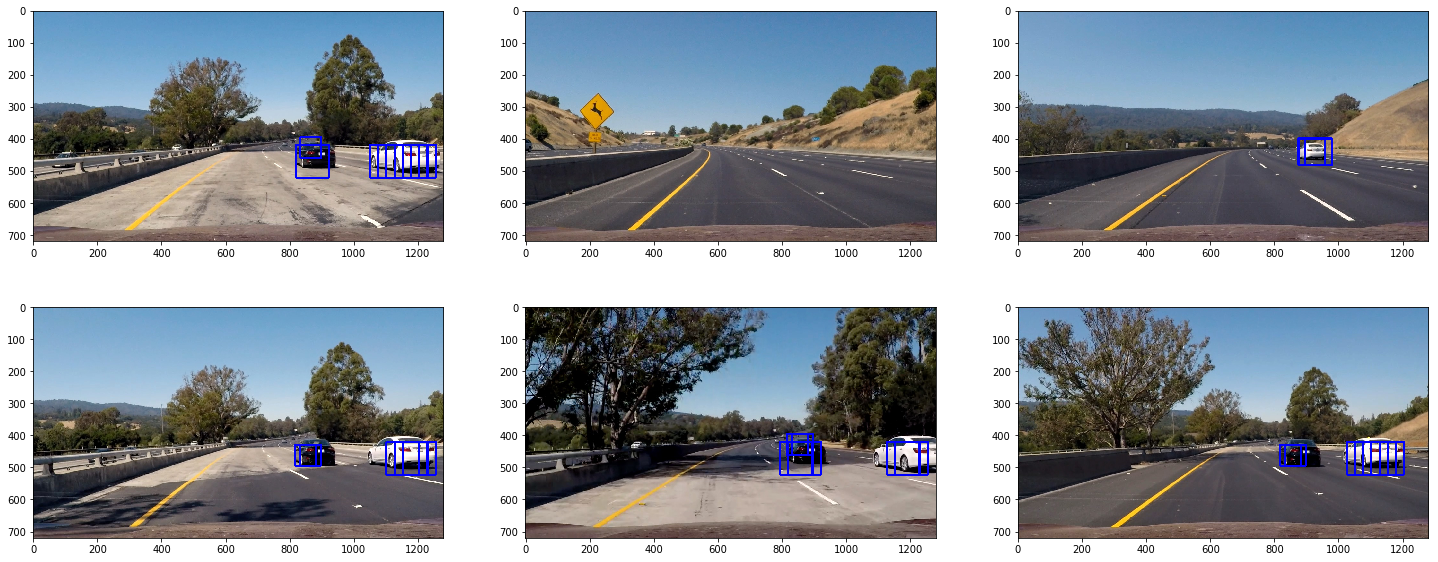

In [10]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]  # sub-sampling
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YUV')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1

    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=False)
   
    bboxes = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                bboxes.append(((int(xbox_left), int(ytop_draw+ystart)),(int(xbox_left+win_draw),int(ytop_draw+win_draw+ystart))))

    return draw_img, bboxes

def apply_sliding_window(image, svc, X_scaler, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    bboxes = []
    ystart = [380, 400, 410, 420, 430, 430, 440, 400, 400, 500] 
    ystop = [480, 500, 500, 556, 556, 560, 560, 560, 560, 650]
    scales = [1, 1.3, 1.4, 1.6, 1., 2.0, 1.9, 1.3, 2.2, 3.0]
    out_img = image
    for i in range (0,len(ystart)):
        out_img, bboxes_small = find_cars(out_img, ystart[i], ystop[i], scales[i], svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        bboxes.extend(bboxes_small)
    
    return out_img, bboxes   

test_images = glob.glob('test_images/*jpg')
i=0
f=plt.figure(figsize=(25, 10))
for img in test_images:
    image = mpimg.imread(img)
    output_image, bboxes = apply_sliding_window(image, svc, X_scaler, pix_per_cell, cell_per_block, spatial_size, hist_bins)   
    #img = cv2.imread(image)
    i = i + 1
    plt.subplot(2, 3, i)
    plt.imshow(output_image)
    #plt.title('Original', fontsize=14)

 

## Creating Heatmap

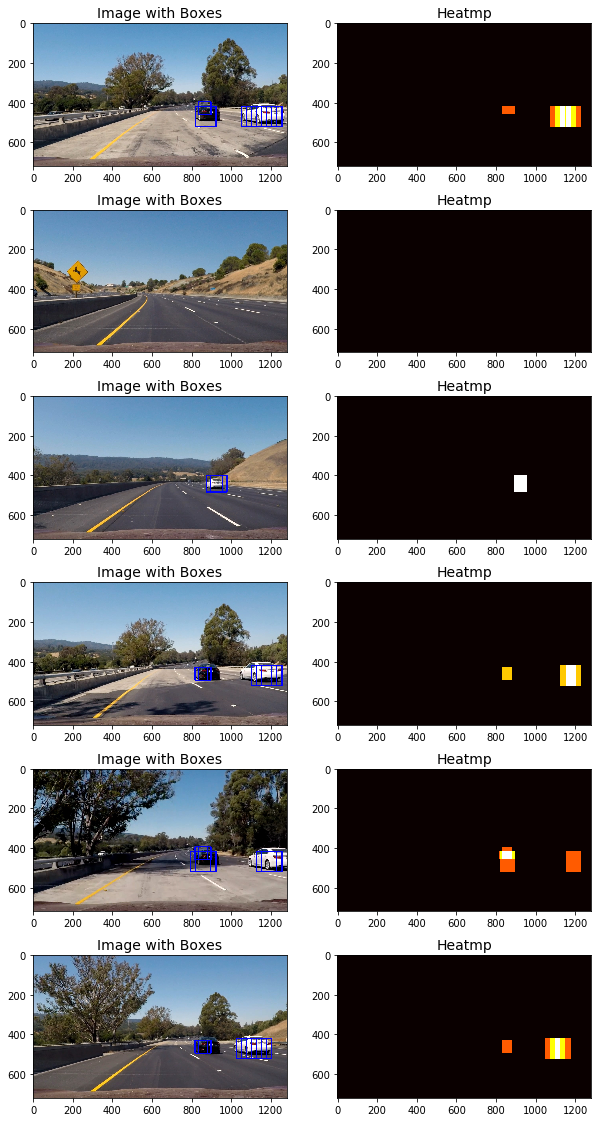

In [7]:
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

i=0
f=plt.figure(figsize=(10, 20))
#f.tight_layout()
for img in test_images:
    image = mpimg.imread(img)
    #draw_image = np.copy(image)
    output_image, bboxes = apply_sliding_window(image, svc, X_scaler, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    heat = np.zeros_like(output_image[:,:,0]).astype(np.float)
    
    # Add heat to each box in box list
    heat = add_heat(heat, bboxes)

    # Apply threshold to help remove false positives
    threshold = 1 
    heat = apply_threshold(heat, threshold)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    ## Find final boxes from heatmap using label function
    plt.subplot(6, 2, 2*i+1)
    plt.imshow(output_image)
    plt.title('Image with Boxes', fontsize=14)
    plt.subplot(6, 2, 2*i+2)
    plt.imshow(heatmap, cmap='hot')
    plt.title('Heatmp', fontsize=14)
    i = i + 1    

## Drawing Bounding Boxes from Blobs:

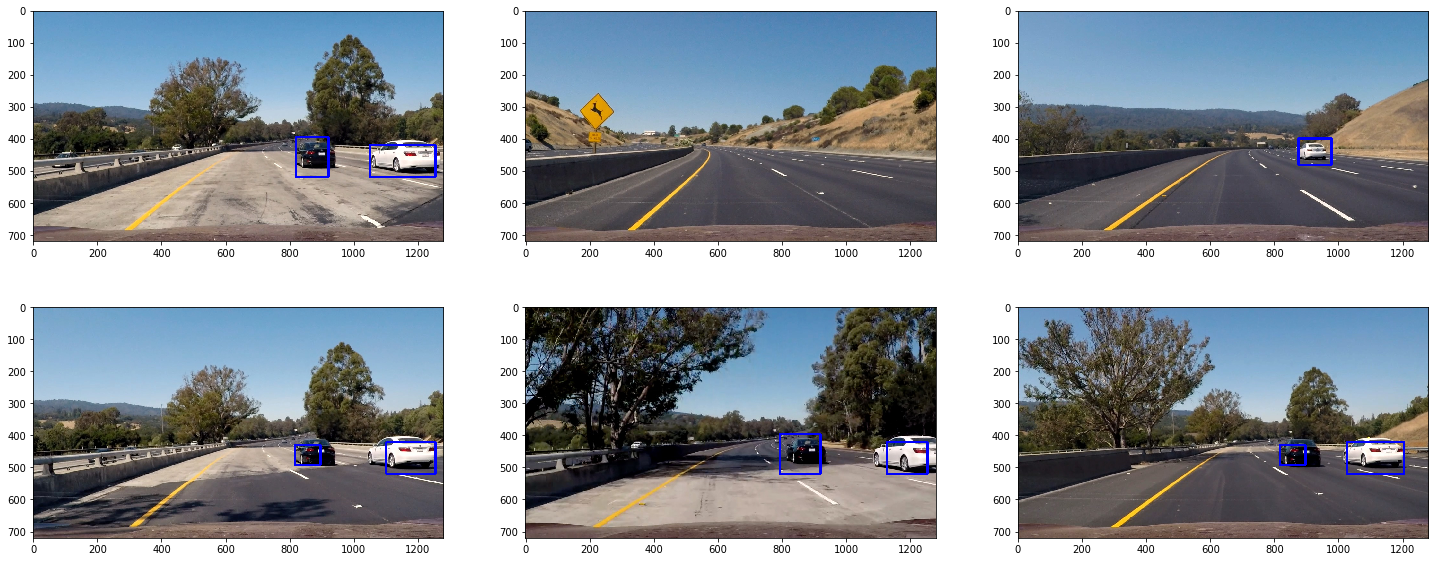

In [8]:
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Finding final boxes from heatmap using label function
i=0
f=plt.figure(figsize=(25, 10))
#f.tight_layout()
for img in test_images:
    image = mpimg.imread(img)
    #draw_image = np.copy(image)
    output_image, bboxes = apply_sliding_window(image, svc, X_scaler, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    heat = np.zeros_like(output_image[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat, bboxes)
    #img = cv2.imread(image)
    heatmap = np.clip(heat, 0, 255)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    i = i + 1
    plt.subplot(2, 3, i)
    plt.imshow(draw_img)
    #plt.title('Original', fontsize=14)
    
    

## Video Processing

In [11]:
from collections import deque
history = deque(maxlen = 8)

def video_processor(image):

    out_img, bboxes = apply_sliding_window(image, svc, X_scaler, pix_per_cell, cell_per_block, spatial_size, hist_bins)
   
    heat = np.zeros_like(out_img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat, bboxes)

    # Apply threshold to help remove false positives
    threshold = 1 
    heat = apply_threshold(heat, threshold)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    history.append(heatmap)
    
    heatmap_now = np.zeros_like(heatmap).astype(np.float)
    for heat in history:
        heatmap = heatmap_now + heat

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    return draw_img

In [13]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

#video_output = 'test_video_out.mp4'
#clip1 = VideoFileClip("test_video.mp4")#.subclip(0,2)
video_output = 'project_video_out.mp4'
clip1 = VideoFileClip("project_video.mp4")#.subclip(0,2)
#video_clip.reader.close()
#video_clip.audio.reader.close_proc()
white_clip = clip1.fl_image(video_processor) 
white_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video project_video_out.mp4
[MoviePy] Writing video project_video_out.mp4


100%|████████████████████████████████████████████████████████████▉| 1260/1261 [1:14:14<00:03,  3.37s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_out.mp4 

